In [97]:
import numpy as np
from sklearn.datasets import fetch_openml

In [17]:
x,y=fetch_openml('mnist_784',version=1,return_X_y=True)

In [26]:
X=x.to_numpy()
Y=y.to_numpy()
Y=Y.astype(int)
type(Y[0])

numpy.int32

Load the MNIST dataset (mnist_784, version=1) from openml. How many number of samples are there in the dataset?

In [27]:
X.shape

(70000, 784)

Access the sample at the index 2022.
What is the label of the sample?  * What is the mean value of the sample?   * How many zeros are there in the sample?

In [28]:
Y[2022]

2

In [29]:
X[2022].mean()

27.761479591836736

In [37]:
np.count_nonzero(X[2022]==0)

643

Create a dataset by taking first 10000 images for training and next 2000 images for testing from the original dataset. Answer the following questions.

How many unique classes are there in the training set?
The number of training samples for the digit-6 are?
The number of training samples for the digit-9 are?
How many unique classes are there in the test set?
Which class has more number of test samples?

In [48]:
x_train,x_test,y_train,y_test=X[:10000],X[10000:12000],Y[:10000],Y[10000:12000]
len(np.unique(y_train))

10

In [54]:
np.sum(y_train==6)

1014

In [55]:
np.sum(y_train==9)

978

In [56]:
len(np.unique(y_test))

10

In [63]:
unique_classes_test=np.unique(y_test)
# Count the number of samples for each class in the test set
test_samples_per_class = {cls: np.sum(y_test == cls) for cls in unique_classes_test}
# Find the class with the maximum number of test samples
class_with_most_test_samples = max(test_samples_per_class, key=test_samples_per_class.get)
print(test_samples_per_class)
print(class_with_most_test_samples)

{0: 205, 1: 224, 2: 185, 3: 196, 4: 204, 5: 185, 6: 194, 7: 209, 8: 183, 9: 215}
1


In [64]:
count,bins=np.histogram(y_test,bins=10)
np.argmax(count)


1

In [66]:
count,bins=np.histogram(y_train,bins=10)
print(count[6])
print(count[9])

1014
978


Consider the above modified training and testing sets with first 10000 images for training and next 2000 images for testing.

Steps to be followed

Collect all digit-6 (Positive class) and digit-9 (Negative class) images and stack them properly as a single datamatrix.
By convention, keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
Similarly, collect the respective labels and store it in a variable (Do sanity check).
Set the label values to 1 for positive classes and -1 for negative classes.
Load 
1
from sklearn.utils import shuffle
Shuffle the datamatrix and labels. (Set 
1
random_state
 value to 1729).
what are the first three labels starting from the index 0?.

In [82]:
dig_6=np.where(y_train==6)[0]
dig_9=np.where(y_train==9)[0]
idx=np.concatenate((dig_6,dig_9))
x_train1=x_train[idx]
y_train1=np.concatenate((np.ones(len(dig_6)),-1*np.ones(len(dig_9))))

In [83]:
from sklearn.utils import shuffle
x_train1,y_train1=shuffle(x_train1,y_train1,random_state=1729)
y_train1[0:3]

array([ 1., -1., -1.])

Instantiate a perceptron classifier that meets the following requirements

random_state = 1729
learning rate = 1
Train for 10 iterations (epoch)
Set shuffle the dataset for each epoch (iteration) as False.
Include the intercept (bias) term.
No regularization
Fit the perceptron classifier on the training dataset. What is the value of 
�
w for the 69th feature after 10 iterations?

In [84]:
from sklearn.linear_model import Perceptron

In [103]:
perceptron=Perceptron(random_state=1729,eta0=1,max_iter=10,shuffle=False)
perceptron.fit(x_train1,y_train1)
weights=perceptron.coef_[0,69]
weights

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


605.0

With respective to the above question and for the same settings.
 Which of the following is the sequence of bias (intercept) updates for the first 5 epochs?

In [104]:
bias=[]
perceptron1=Perceptron(random_state=1729,eta0=1,max_iter=1,shuffle=False)
for i in range(5):
    perceptron1.partial_fit(x_train1,y_train1,classes=np.unique(y_train1))
    bias.append(perceptron1.intercept_[0])
bias

[-1.0, -4.0, -4.0, -6.0, -5.0]

From the MNIST dataset, create a new dataset by taking first 10000 images for training and next 2000 images for testing.

Collect all digit-5 (Positive class) and digit-3 (Negative class) images and stack them properly as a single datamatrix.
By convention, keep all digit-5 images from index 0 to i followed by digit-3 images from index i+1 to n (i denotes the end index of digit-5 images)
Similarly, collect the respective labels and store it in a variable (Do sanity check).
Set the label values to 1 for positive class and -1 for negative class.
Instantiate a perceptron classifier with the below parameters
random_state = 42
learning rate = 1
Train for 100 iterations (epoch)
Should shuffle the dataset for each epoch (iteration)
Include the intercept (bias) term.
No regularization
Use the training set for fitting the perceptron model and use the test data to make the predictions

In [131]:
dig_5_train=np.where(y_train==5)[0]
dig_3_train=np.where(y_train==3)[0]
dig_5_test=np.where(y_test==5)[0]
dig_3_test=np.where(y_test==3)[0]
index_train=np.concatenate((dig_5_train,dig_3_train))
index_test=np.concatenate((dig_5_test,dig_3_test))
x_train2=x_train[index_train]
y_train2=np.concatenate((np.ones(len(dig_5_train)),-1*np.ones(len(dig_3_train))))
x_test2=x_test[index_test]
y_test2=np.concatenate((np.ones(len(dig_5_test)),-1*np.ones(len(dig_3_test))))

In [132]:
count1,bin1=np.histogram(y_train,bins=10)
print(count1[5])
print(count1[3])

863
1032


In [133]:
per=Perceptron(random_state=42,eta0=1,shuffle=True,max_iter=100,penalty=None,fit_intercept=True)
per.fit(x_train2,y_train2)
y_pred=per.predict(x_test2)

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score

Accuracy score=  0.952755905511811
Precision score=  0.9664804469273743
Recall score=  0.9351351351351351


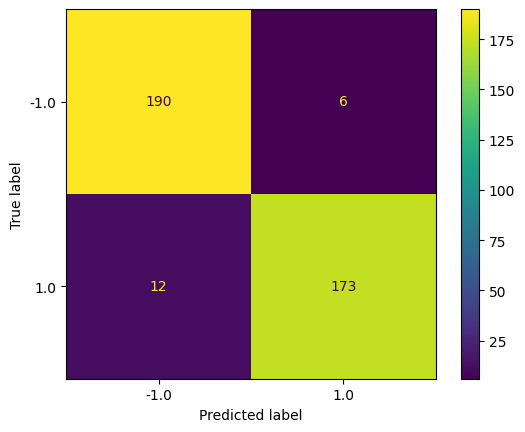

In [138]:
cmd=ConfusionMatrixDisplay.from_predictions(y_test2,y_pred)
a=accuracy_score(y_test2,y_pred)
p=precision_score(y_test2,y_pred)
r=recall_score(y_test2,y_pred)
print('Accuracy score= ',a)
print('Precision score= ',p)
print('Recall score= ',r)

In the same model setup just change the shuffle parameter to False, refit the classifier on training data, make predictions on test data and observe the accuracy, precision score and recall score. Which of the following statements are True based on your observations?

In [141]:
per1=Perceptron(random_state=42,eta0=1,shuffle=False,max_iter=100,penalty=None,fit_intercept=True)
per1.fit(x_train2,y_train2)
y_pred1=per1.predict(x_test2)

Accuracy score=  0.5485564304461942
Precision score=  1.0
Recall score=  0.07027027027027027


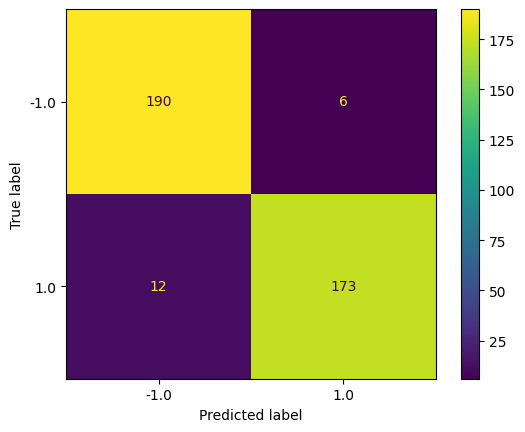

In [142]:
cmd=ConfusionMatrixDisplay.from_predictions(y_test2,y_pred)
a1=accuracy_score(y_test2,y_pred1)
p1=precision_score(y_test2,y_pred1)
r1=recall_score(y_test2,y_pred1)
print('Accuracy score= ',a1)
print('Precision score= ',p1)
print('Recall score= ',r1)